In [1]:
import geopandas as gpd
import folium
from sentinelsat import SentinelAPI

In [2]:
aoi = gpd.read_file('london.geojson')
aoi

,geometry
0,"POLYGON ((-0.12257 51.54676, -0.09424 51.54676..."


In [3]:
coordinates = aoi.total_bounds
print(coordinates)

[-0.12256622 51.54676206 -0.0942421  51.5631989 ]


In [4]:
lon1 = coordinates[0]
lat1 = coordinates[1]
lon2 = coordinates[2]
lat2 = coordinates[3]

In [5]:
m = folium.Map([(lat1 + lat2)/2, (lon1 + lon2)/2], zoom_start = 14) 
folium.GeoJson(aoi, name = 'Area of Interest').add_to(m)
m

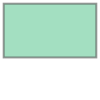

In [6]:
footprint = None
for i in aoi.geometry:
    footprint = i
    
footprint

In [7]:
user = 'heemanshumhaskar' 
password = 'remotelysensed' 

api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

products = api.query(footprint,
                     date = ('20220401', '20220415'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0, 100))

In [8]:
products_gdf = api.to_geodataframe(products)
products_gdf_sorted = products_gdf.sort_values(['ingestiondate'], ascending = True)
products_gdf_sorted

,title,link,link_alternative,link_icon,summary,ondemand,generationdate,beginposition,endposition,ingestiondate,...,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid,geometry
dda68184-f59e-47f9-8da9-50924bd47f33,S2B_MSIL2A_20220401T110619_N0400_R137_T30UXC_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-04-01T11:06:19.024Z, Instrument: MS...",false,2022-04-01 15:35:13,2022-04-01 11:06:19.024,2022-04-01 11:06:19.024,2022-04-01 20:19:44.258,...,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_VGS2_20220401T153513_S2022...,S2B_OPER_MSI_L2A_TL_VGS2_20220401T153513_A0264...,S2B_MSIL2A_20220401T110619_N0400_R137_T30UXC_2...,dda68184-f59e-47f9-8da9-50924bd47f33,"MULTIPOLYGON (((0.01125 51.32452, 0.07776 52.3..."
3fe0bcc4-6ecb-412d-920c-ce011784677d,S2B_MSIL2A_20220401T110619_N0400_R137_T30UYC_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-04-01T11:06:19.024Z, Instrument: MS...",false,2022-04-01 15:35:13,2022-04-01 11:06:19.024,2022-04-01 11:06:19.024,2022-04-01 20:33:40.651,...,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_VGS2_20220401T153513_S2022...,S2B_OPER_MSI_L2A_TL_VGS2_20220401T153513_A0264...,S2B_MSIL2A_20220401T110619_N0400_R137_T30UYC_2...,3fe0bcc4-6ecb-412d-920c-ce011784677d,"MULTIPOLYGON (((1.26780 51.28437, 1.26951 51.2..."
d16f936a-2263-434a-bdeb-5cc23eac3d7b,S2A_MSIL2A_20220403T105621_N0400_R094_T30UYC_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-04-03T10:56:21.024Z, Instrument: MS...",false,2022-04-03 14:39:49,2022-04-03 10:56:21.024,2022-04-03 10:56:21.024,2022-04-03 19:06:14.147,...,S2MSI2A,2015-028A,ASCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_VGS2_20220403T143949_S2022...,S2A_OPER_MSI_L2A_TL_VGS2_20220403T143949_A0354...,S2A_MSIL2A_20220403T105621_N0400_R094_T30UYC_2...,d16f936a-2263-434a-bdeb-5cc23eac3d7b,"MULTIPOLYGON (((1.44210 51.27893, 1.53998 52.2..."
10183355-7cc2-4d9d-b914-a36590bbd7e5,S2A_MSIL2A_20220403T105621_N0400_R094_T30UXC_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-04-03T10:56:21.024Z, Instrument: MS...",false,2022-04-03 14:39:49,2022-04-03 10:56:21.024,2022-04-03 10:56:21.024,2022-04-03 19:16:25.581,...,S2MSI2A,2015-028A,ASCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_VGS2_20220403T143949_S2022...,S2A_OPER_MSI_L2A_TL_VGS2_20220403T143949_A0354...,S2A_MSIL2A_20220403T105621_N0400_R094_T30UXC_2...,10183355-7cc2-4d9d-b914-a36590bbd7e5,"MULTIPOLYGON (((0.01125 51.32452, 0.07776 52.3..."
cd925348-5ca8-47d8-acde-573d63eb1557,S2A_MSIL2A_20220406T110621_N0400_R137_T30UYC_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-04-06T11:06:21.024Z, Instrument: MS...",false,2022-04-06 17:28:13,2022-04-06 11:06:21.024,2022-04-06 11:06:21.024,2022-04-06 22:20:32.664,...,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_VGS2_20220406T172813_S2022...,S2A_OPER_MSI_L2A_TL_VGS2_20220406T172813_A0354...,S2A_MSIL2A_20220406T110621_N0400_R137_T30UYC_2...,cd925348-5ca8-47d8-acde-573d63eb1557,"MULTIPOLYGON (((1.26219 51.28455, 1.26480 51.2..."
e232d490-d01c-48c6-8e99-6d72be7828f8,S2A_MSIL2A_20220406T110621_N0400_R137_T30UXC_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-04-06T11:06:21.024Z, Instrument: MS...",false,2022-04-06 17:28:13,2022-04-06 11:06:21.02

## Checking the number of tiles intersecting the area of interest.

In [9]:
m = folium.Map([(lat1 + lat2)/2, (lon1 + lon2)/2], zoom_start = 14) 
folium.GeoJson(aoi, name = 'Area of Interest').add_to(m)

for j,i in enumerate(products_gdf_sorted['geometry']):
    bound = folium.GeoJson(i, name='Sentinel_{}'.format(products_gdf_sorted['ingestiondate'].iloc[j]))
    bound.add_to(m)
    
folium.LayerControl().add_to(m)
m

In [ ]:
api.download() # Call the uuid of the tile.